In [1]:
#import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# mount ggole drive for dataset file access - requires login step.  
# An alternative is to upload the file from your local machine or directly from github.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading dataset file from google drive
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# extract feature variables from dataframe
x=df.drop(['Outcome'], axis=1)
# extract target variable from dataframe
y=df.Outcome


In [254]:
# Build NN model
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
   Dense(21, activation="relu", input_dim=8),
   Dense(1, activation='sigmoid'),
 ]);

classifier.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 21)                189       
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 22        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [255]:
# Compile model
from tensorflow.keras.optimizers import Adam
classifier.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [256]:
history=classifier.fit(x, y, validation_split=0.2, batch_size = 32, epochs = 1000, verbose=0)

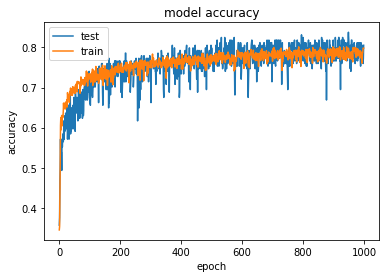

In [257]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper left')
plt.show()

In [272]:
# Get confusion matrix for randoly slected test sets

# 
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split data into train/test sets with randomization
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)


y_pred = classifier.predict(x_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]
y_test = np.array(y_test)
total = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(y_pred)):
  total=total+1
  if (y_test[i] == 1 and y_pred[i] == 1): tp=tp+1
  elif (y_test[i] == 0 and y_pred[i] == 0): tn=tn+1
  elif (y_test[i] == 0 and y_pred[i] == 1): fp=fp+1
  elif (y_test[i] == 1 and y_pred[i] == 0): fn=fn+1
  else: print("E")

print("Total " + str(total))
print("Accuracy " + str((tp+tn)/total))
print("TN: ",tn/total)
print("TP: ",tp/total)
print("FN: ",fn/total)
print("FP: ",fp/total)

Total 154
Accuracy 0.7922077922077922
TN:  0.564935064935065
TP:  0.22727272727272727
FN:  0.14285714285714285
FP:  0.06493506493506493
